In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("Pokemon.csv")
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [4]:
df.loc[ (df["Type 1"]=="Dark") & (df["Attack"] > 70)].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
213,198,Murkrow,Dark,Flying,405,60,85,42,85,42,91,2,False
233,215,Sneasel,Dark,Ice,430,55,95,55,35,75,115,2,False
247,229,Houndoom,Dark,Fire,500,75,90,50,110,80,95,2,False
248,229,HoundoomMega Houndoom,Dark,Fire,600,75,90,90,140,90,115,2,False
285,262,Mightyena,Dark,NaN,420,70,90,70,60,60,70,3,False


In [5]:
df.sort_values(["Type 1", "HP"], ascending=[1, 1]).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
462,415,Combee,Bug,Flying,244,30,30,42,30,42,70,4,False
603,543,Venipede,Bug,Poison,260,30,45,59,30,39,57,5,False
314,290,Nincada,Bug,Ground,266,31,45,90,30,30,40,3,False


In [6]:
new_df = df.loc[(df["Type 1"] == "Fire") & (df["Type 2"] == "Flying") & (df["Speed"] > 60)]    #Seleciona apenas pokemons do tipo fogo e voador com speed maior que 60

new_df.reset_index(drop=True, inplace=True)

new_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
1,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
4,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
5,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


In [7]:
df.groupby(df["Type 1"])["Attack"].mean()

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

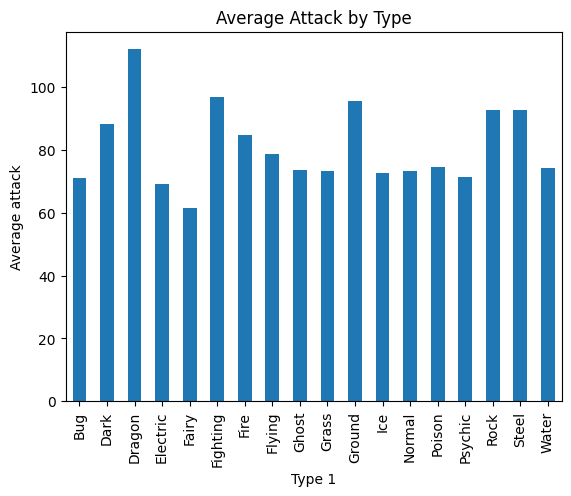

In [8]:
df.groupby(df["Type 1"])["Attack"].mean().plot.bar(title="Average Attack by Type")
#df.groupby(df["Type 1"])["Defense"].mean().plot.bar(title="Ataque Medio por Tipo", color="red")

plt.ylabel("Average attack");

In [52]:
dados = {
    "Tipo": list(df["Type 1"].unique()),
    "Ataque_Medio": list(df.groupby("Type 1")["Attack"].mean()),
    "HP_Medio": list(df.groupby("Type 1")["HP"].mean())
}
dados

{'Tipo': ['Grass',
  'Fire',
  'Water',
  'Bug',
  'Normal',
  'Poison',
  'Electric',
  'Ground',
  'Fairy',
  'Fighting',
  'Psychic',
  'Rock',
  'Ghost',
  'Ice',
  'Dragon',
  'Dark',
  'Steel',
  'Flying'],
 'Ataque_Medio': [70.97101449275362,
  88.38709677419355,
  112.125,
  69.0909090909091,
  61.529411764705884,
  96.77777777777777,
  84.76923076923077,
  78.75,
  73.78125,
  73.21428571428571,
  95.75,
  72.75,
  73.46938775510205,
  74.67857142857143,
  71.45614035087719,
  92.86363636363636,
  92.70370370370371,
  74.15178571428571],
 'HP_Medio': [56.88405797101449,
  66.80645161290323,
  83.3125,
  59.79545454545455,
  74.11764705882354,
  69.85185185185185,
  69.90384615384616,
  70.75,
  64.4375,
  67.27142857142857,
  73.78125,
  72.0,
  77.27551020408163,
  67.25,
  70.63157894736842,
  65.36363636363636,
  65.22222222222223,
  72.0625]}

In [64]:
novo_df = pd.DataFrame(dados)

In [66]:
novo_df = novo_df.set_index("Tipo")

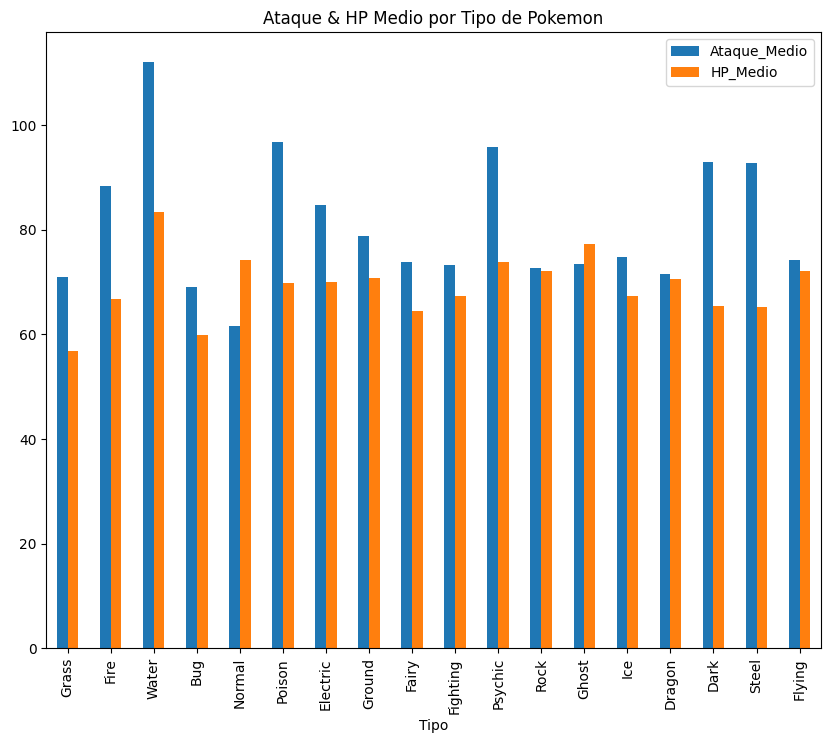

In [70]:
novo_df.plot(kind="bar", figsize=(10,8), title="Ataque & HP Medio por Tipo de Pokemon");

